<img src="Branded_Logo_CUDenver.PNG" width="150">

## <center>CSCI 4580/5580 - Data Science – Spring 2022</center>
<center>Lab 3: Statistical Analysis</center><center><font color='red'>Deadline: February 18, 2022 - 11:59 PM</font></center><center>Total Points: 100</center>

## Instructions
- Please note that this lab must be done individually. By submitting this lab, you certify that this is your own work, your code will be checked against other submissions and resources using automatic tools.
- If you encounter error messages similar to [<font color='brown'>ModuleNotFoundError: </font>No module named 'numpy'], make sure that you've installed the required libraries (refer to instructions in lab 0 for more details).

## Supplementary Materials
We have added links to tutotials for the packages that are used in this lab on Canvas under Modules → Supplementary Materials. This module will be gradually updated throughout the semester. 

## Submission
You need to submit a single .ipynb file on Canvas, named your-lastname_your-first-name.ipynb. For example, if your name is John Smith, you should name the file smith_john.ipynb.
- Please do not include extra files such as the input datasets in your submission.
- Answer Questions 1 - 5 in the designated cells. Please do not add or remove any cells. 
- Please download your submission file after submission and make sure it is not corrupted. Use the 'Run All' option from the 'Cell' menu to ensure all cells run without any issues. We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.

## Need Help?
If you need help with this lab, please email me at sundous.hussein@ucdenver.edu or come to my office hours. We also encourage you to ask your questions on the designated channel for the lab on Microsoft Teams. This way, you may receive assistance from your classmates that might’ve ran through the same issues.

In this lab we will review some basic tools for statistical analysis.

# Inferential Statistics

Inferential statistics is about making inferences about what produced the data: a single process or two? a linear process or a constant one? It contrasts with descriptive statistics which is about measuring properties of the data, and in turn making estimates about a population. 

We'll begin by initializing a random seed for Numpy's random number generator. The random numbers generated by computers are actually pseudo-random, meaning they form a repeatable sequence given the seed. With the same seed, you will always get the same sequence of pseudo-random numbers which is good for repeatability or testing correctness of a program. On the other hand, if you execute the other cells of this notebook without setting the seed, you can see how the results vary between random samples. 

In [35]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
np.random.seed(12345678)

Next we'll generate two samples of 400 points from the normal distribution. The first has mean zero, the second has a mean (loc param) of 0.15. Both have unit variance.

In [36]:
a = stats.norm.rvs(size=400)
b = stats.norm.rvs(loc=0.15, size=400)

Let's look at histograms of both distributions on the same set of bins:

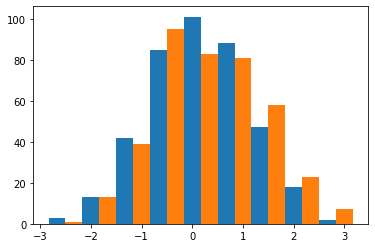

In [37]:
bins = np.linspace(-3,3,10)
plt.hist(a,bins,rwidth=0.5)
plt.hist(b,bins,rwidth=0.5,align=u'right')
plt.show()

## Two-Sample T-test

Let's start by analyzing our data with a two-sample T-test. This test will evaluate the null hypothesis that the two samples have the same mean.

In [38]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-1.6540130327107168, pvalue=0.09851813011169046)

The test returns the value of the t-statistic, and the p-value of the t-test. Review the formula for the t-statistic, and make sure you agree with the value it generated.


<b>Question 1</b>) Was the test significant at the 0.05 significance level? [10 points]
<br>Answer:The p-value is greate than 0.05 which means the result is insignificant
<br>Enter the t-statistic value, and the p-value below:
<br>t-stat:-1.6540130327107168
<br>p-value:0.09851813011169046

Try running the cells above again *without* initializing the random number generator again (don't eval that cell). What happened this time? This is a good reminder that unusual events can happen by chance. 
Ttest_indResult(statistic=-4.541825228899701, pvalue=6.438072706866254e-06)

Now set the random seed again and generate data:

In [39]:
np.random.seed(12345678)
a = stats.norm.rvs(size=400)
b = stats.norm.rvs(loc=0.15, size=400)

In [40]:
ea=np.exp(a)
eb=np.exp(b)

Which will produce skewed (non-normal) distributions for the datasets. Now let's try the t-test again.

<b>Question 2</b>) Repeat the t-test on these new vectors. Increase the bin range to (-3,20). Then plot histogram of both distributions. Was the test significant at the 0.05 significance level? [30 points]

In [41]:
# Add code for t-test here
stats.ttest_ind(ea, eb)
# Test is"not significant" if p value is > .05 and "significant" if  pvalue is < .05 , it is signficant in this case .

Ttest_indResult(statistic=-2.3791444033418028, pvalue=0.017587109088813016)

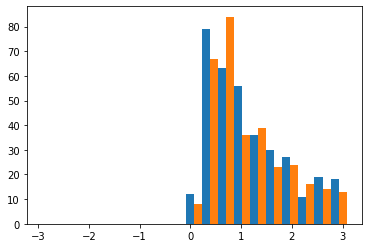

In [42]:
# Plot the histogram here
bins = np.linspace(-3,3,20)
plt.hist(ea,bins,rwidth=0.5)
plt.hist(eb,bins,rwidth=0.5,align=u'right')
plt.show()

## The K-S Test

The Kolmogorov-Smirnov test is a very versatile, non-parametric test that compares samples of data from (potentially) different distributions. You can apply it directly to datasets such as ea and eb above. Go ahead and try it:

In [43]:
stats.ks_2samp(ea,eb)

KstestResult(statistic=0.0775, pvalue=0.18096072488295206)

In [44]:
stats.ks_2samp(a,b)

KstestResult(statistic=0.0775, pvalue=0.18096072488295206)

<b>Question 3</b>) Was the ks-test result significant at 0.05? Compare it with the test on (a,b) and the test on (ea,ab). Which result is it closer to? What does this tell you about the reliability of these tests? [25 points]

Answer:(ea,ab) is > 0.05 and  (a,b) is > 0.05.
Pvalue is less than 0.05.
see below for reminaing answer

In [45]:
#I am not sure with result to compare whether ea, ab vs a,b or two-sample test vs k-s test
#Ran the k-s test for both ea,ab and a,b they both have the same p-value
#if we compare the pvalue for two sample test vs k-s test then pvalue is closer as it is not higher than 0.05
#H0 the data followed a specified distribution 
#Ha the data do not follow the specified distribution 
#Answer:
#K-S test is capable to pick difference if comparing similiar data set but variance was different vs the t-test.

## Analyzing Discrete Data

Often, you'll want to analyze discrete data, especially count data. Bag-of-Words text data is an important case. Next load the dataset for this exercise. 

In [46]:
import pandas as pd
nips = pd.read_csv("nips.10cols.txt",sep="\t")

and take a look at the first few rows:

In [47]:
nips.head(10)

,term1,term2,term3,term4,term5,term6,term7,term8,term9,term10
0,67,7,18,7,5,1,16,3,4,3
1,44,0,11,6,37,10,3,31,0,6
2,27,1,16,5,15,1,12,6,9,2
3,16,11,26,35,21,10,10,17,21,28
4,31,3,48,25,14,8,18,40,2,1
5,75,0,17,3,12,26,43,16,50,0
6,22,28,3,20,9,13,6,26,20,5
7,17,1,13,9,5,3,10,17,0,1
8,22,0,33,5,28,1,16,26,6,1
9,23,1,21,39,16,7,9,13,4,1


The rows represent documents from a conference (NIPS). The columns represent certain key words (they've been obfuscated). From the frequencies of these words, you can determine something about the topic of the paper. But you can't simply compare counts. The chances of two documents having exactly the same word counts is close to zero, even if the topics are very similar. 

Instead we can use a statistical test to ask whether the same random process might have generated two different rows in the table. The appropriate test is the Chi-squared test. 

Let's compare the counts for documents 1479 and 1480 for term1 and term2: (note we have to number carefully since column labels are one-based)

In [48]:
nmat = nips.to_numpy()
m=nmat[1479:1481,[0,1]]
m

array([[11, 21],
       [10, 12]], dtype=int64)

In [49]:
stats.chi2_contingency(m)

(0.2878910861865407,
 0.5915751520487913,
 1,
 array([[12.44444444, 19.55555556],
        [ 8.55555556, 13.44444444]]))

The test returns (first) the statistic value, and then the p-value.

<b>Question 4</b>) Was the chi-squared test significant at 0.05? [10 points] 

Answer:
where stats.chi2.contingency(m) gives "=(test statistic value, p-value, df)" and array([[]]) gives "the expected frequencies with the help of marginal distribution."

Thus, the value of Chi-square test statistic, X^2 is 0.2879 (up to 4 decimal places) which follows chi-square distribution with 1 degree of freedom.
The corresponding p-value is 0.5916 (up to 4 decimal places).
As the p-value (0.5916) is greater than the significance level (0.05) thus we fail to reject the null hypothesis.
It concludes that there is no association between the given attributes. In other words, the chi-square test is not significant at 5% significance level.
Thus, the desired answer is "No, the chi-square test is not significant at 5% significance level."

<b>Question 5</b>) Repeat the test for term 4 and term 6 of the same documents (careful about numbering). What was the p-value?  [25 points]

In [50]:
# Add you code for Question 5 here
nmat = nips.to_numpy()
n=nmat[1479:1481,[3,5]]
n

array([[ 6,  3],
       [ 3, 15]], dtype=int64)

In [51]:
stats.chi2_contingency(n)

(4.6875,
 0.030382821976577483,
 1,
 array([[ 3.,  6.],
        [ 6., 12.]]))

Answer: